In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd 
from sklearn.cluster import AgglomerativeClustering
import sys


Importation des fichiers de données pour travaux

In [4]:

sys.path.append('/home/silvock/Documents/Openclassrooms/Formation_data_analyst/project_5_prod_market_study/code')
print(sys.path)

['', '/usr/lib/python35.zip', '/usr/lib/python3.5', '/usr/lib/python3.5/plat-x86_64-linux-gnu', '/usr/lib/python3.5/lib-dynload', '/usr/local/lib/python3.5/dist-packages', '/usr/local/lib/python3.5/dist-packages/daemonocle-1.0.1-py3.5.egg', '/usr/local/lib/python3.5/dist-packages/certifi-2018.1.18-py3.5.egg', '/usr/local/lib/python3.5/dist-packages/click-6.7-py3.5.egg', '/usr/local/lib/python3.5/dist-packages/setuptools-39.0.1-py3.5.egg', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.5/dist-packages/IPython/extensions', '/home/silvock/.ipython', '/home/silvock/Documents/Openclassrooms/Formation_data_analyst/project_5_prod_market_study/code']


In [5]:
import my_functions as mfct

In [138]:
data = pd.read_csv('/home/silvock/Documents/Openclassrooms/Formation_data_analyst/project_5_prod_market_study/fichiers_csv/population_2012.csv')

data2 = pd.read_csv('/home/silvock/Documents/Openclassrooms/Formation_data_analyst/project_5_prod_market_study/fichiers_csv/df_base_projet3.csv')

# Mission 1 : Construisez votre échantillon contenant l'ensemble des pays disponibles, chacun caractérisé par ces variables :

    Différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage.
    Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays.
    Disponibilité alimentaire en protéines par habitant.
    Disponibilité alimentaire en calories par habitant.


## Différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage.

In [139]:
data.drop(['Code Domaine','Domaine', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Code Année', 'Unité','Année'], axis=1, inplace=True)

In [140]:
data['Population 2012 en milliers'] = data['Valeur']
del data['Valeur']
data.head()

,Code Pays,Pays,Population 2012 en milliers
0,2,Afghanistan,29825
1,202,Afrique du Sud,52386
2,3,Albanie,3162
3,4,Algérie,38482
4,79,Allemagne,82800


In [141]:
data2

,Code Pays,Pays,Année,Produit,Code Produit,Nature Produit,Aliments pour animaux (en milliers de tonnes),Autres Utilisations (en milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Semences (en milliers de tonnes),Traitement (en milliers de tonnes),Population totale (en milliers),Disponibilité alimentaire (Kcal/an),Disponibilité alimentaire en quantité (kg/an),ratio_energie_poids en Kcal/an,Nature Produit 2,Disponibilité de protéines en quantité (Kg/an),ratio_poids_proteines_poids_total_en_kg_an,Nature Produit 3
0,1,Arménie,2013,Abats Comestible,2736,autre,0.0,3.0,14.0,4.59,...,0.0,0.0,2977.0,1.521247e+07,13664.43,1113.289760,animal,2444.86125,0.178922,non viande
1,2,Afghanistan,2013,Abats Comestible,2736,autre,0.0,0.0,5.0,1.72,...,0.0,0.0,30552.0,5.575740e+07,52549.44,1061.046512,animal,8586.63960,0.163401,non viande
2,3,Albanie,2013,Abats Comestible,2736,autre,0.0,0.0,11.0,3.50,...,0.0,0.0,3173.0,1.273960e+07,11105.50,1147.142857,animal,1853.03200,0.166857,non viande
3,4,Algérie,2013,Abats Comestible,2736,autre,0.0,0.0,4.0,1.45,...,0.0,0.0,39208.0,5.724368e+07,56851.60,1006.896552,animal,9015.87960,0.158586,non viande
4,7,Angola,2013,Abats Comestible,2736,autre,0.0,0.0,3.0,1.15,...,0.0,0.0,21472.0,2.351184e+07,24692.80,952.173913,animal,4388.87680,0.177739,non viande
5,8,Antigua-et-Barbuda,2013,Abats Comestible,2736,autre,0.0,0.0,8.0,2.74,...,0.0,0.0,90.0,2.628000e+05,246.60,1065.693431,animal,45.00450,0.182500,non viande
6,9,Argentine,2013,Abats Comestible,2736,autre,0.0,134.0,16.0,5.56,...,0.0,0.0,41446.0,2.420446e+08,230439.76,1050.359712,animal,42055.25620,0.182500,non viande
7,10,Australie,2013,Abats Comestible,2736,autre,0.0,14.0,24.0,7.96,...,0.0,0.0,23343.0,2.044847e+08,185810.28,1100.502513,animal,32887.95270,0.176997,non viande
8,11,Autriche,2013,Abats Comestible,2736,autre,0.0,0.0,4.0,1.24,...,0.0,0.0,8495.0,1.240270e+07,10533.80,1177.419355,animal,1953.42525,0.185444,non viande
9,12,Bahamas,2013,Abats Comestible,2736,autre,0.0,0.0,7.0,2.43,...,0.0,0.0,377.0,9.632350e+05,916.11,1051.440329,animal,166.50205,0.181749,non viande


In [142]:
df_base = pd.merge(data,data2, 'outer')
df_base

,Code Pays,Pays,Population 2012 en milliers,Année,Produit,Code Produit,Nature Produit,Aliments pour animaux (en milliers de tonnes),Autres Utilisations (en milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),...,Semences (en milliers de tonnes),Traitement (en milliers de tonnes),Population totale (en milliers),Disponibilité alimentaire (Kcal/an),Disponibilité alimentaire en quantité (kg/an),ratio_energie_poids en Kcal/an,Nature Produit 2,Disponibilité de protéines en quantité (Kg/an),ratio_poids_proteines_poids_total_en_kg_an,Nature Produit 3
0,2,Afghanistan,29825,2013,Abats Comestible,2736,autre,0.0,0.0,5.0,...,0.0,0.0,30552.0,5.575740e+07,5.254944e+04,1061.046512,animal,8.586640e+03,0.163401,non viande
1,2,Afghanistan,29825,2013,"Agrumes, Autres",2614,autre,0.0,0.0,1.0,...,0.0,0.0,30552.0,1.115148e+07,3.941208e+04,282.945736,végétal,2.230296e+02,0.005659,non viande
2,2,Afghanistan,29825,2013,Aliments pour enfants,2680,autre,0.0,0.0,1.0,...,0.0,0.0,30552.0,1.115148e+07,1.833120e+03,6083.333333,végétal,3.345444e+02,0.182500,non viande
3,2,Afghanistan,29825,2013,Ananas,2618,autre,0.0,0.0,0.0,...,0.0,0.0,30552.0,0.000000e+00,0.000000e+00,NaN,végétal,0.000000e+00,NaN,non viande
4,2,Afghanistan,29825,2013,Bananes,2615,autre,0.0,0.0,4.0,...,0.0,0.0,30552.0,4.460592e+07,8.249040e+04,540.740741,végétal,5.575740e+02,0.006759,non viande
5,2,Afghanistan,29825,2013,"Beurre, Ghee",2740,autre,0.0,0.0,23.0,...,0.0,0.0,30552.0,2.564840e+08,3.574584e+04,7175.213675,animal,3.345444e+02,0.009359,non viande
6,2,Afghanistan,29825,2013,Bière,2656,autre,0.0,0.0,0.0,...,0.0,0.0,30552.0,0.000000e+00,2.749680e+03,0.000000,végétal,0.000000e+00,0.000000,non viande
7,2,Afghanistan,29825,2013,Blé,2511,céréales,0.0,0.0,1369.0,...,322.0,0.0,30552.0,1.526638e+10,4.895347e+06,3118.548337,végétal,4.116011e+05,0.084080,non viande
8,2,Afghanistan,29825,2013,Boissons Alcooliques,2658,autre,0.0,0.0,0.0,...,0.0,0.0,30552.0,0.000000e+00,0.000000e+00,NaN,végétal,0.000000e+00,NaN,non viande
9,2,Afghanistan,29825,2013,Café,2630,autre,0.0,0.0,0.0,...,0.0,0.0,30552.0,0.000000e+00,0.000000e+00,NaN,végétal,0.000000e+00,NaN,non viande


In [143]:
df_base['Evolution population 2012/2013 en pourcentage'] = (df_base['Population totale (en milliers)'] / df_base['Population 2012 en milliers'])*100-100 

In [144]:
df_base.columns

Index(['Code Pays', 'Pays', 'Population 2012 en milliers', 'Année', 'Produit',
       'Code Produit', 'Nature Produit',
       'Aliments pour animaux (en milliers de tonnes)',
       'Autres Utilisations (en milliers de tonnes)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure (en milliers de tonnes)',
       'Nourriture (en milliers de tonnes)', 'Pertes (en milliers de tonnes)',
       'Semences (en milliers de tonnes)',
       'Traitement (en milliers de tonnes)', 'Population totale (en milliers)',
       'Disponibilité alimentaire (Kcal/an)',
       'Disponibilité alimentaire en quantité (kg/an)',
       'ratio_energie_poids en Kcal/an', 'Nature Produit 2',
       'Disponibilité de protéines en quantité (Kg/an)',
       'ratio_poids_proteine

In [145]:
df_base.drop(['Population 2012 en milliers', 'Année', 'Aliments pour animaux (en milliers de tonnes)','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de matière grasse en quantité (g/personne/jour)','Disponibilité intérieure (en milliers de tonnes)','Nourriture (en milliers de tonnes)', 'Pertes (en milliers de tonnes)','Semences (en milliers de tonnes)','Traitement (en milliers de tonnes)', 'Population totale (en milliers)','Disponibilité alimentaire en quantité (kg/an)','ratio_energie_poids en Kcal/an','ratio_poids_proteines_poids_total_en_kg_an','Autres Utilisations (en milliers de tonnes)','Disponibilité alimentaire (Kcal/an)','Disponibilité de protéines en quantité (Kg/an)'], axis=1, inplace=True)
df_base

,Code Pays,Pays,Produit,Code Produit,Nature Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nature Produit 2,Nature Produit 3,Evolution population 2012/2013 en pourcentage
0,2,Afghanistan,Abats Comestible,2736,autre,5.0,0.77,animal,non viande,2.437552
1,2,Afghanistan,"Agrumes, Autres",2614,autre,1.0,0.02,végétal,non viande,2.437552
2,2,Afghanistan,Aliments pour enfants,2680,autre,1.0,0.03,végétal,non viande,2.437552
3,2,Afghanistan,Ananas,2618,autre,0.0,0.00,végétal,non viande,2.437552
4,2,Afghanistan,Bananes,2615,autre,4.0,0.05,végétal,non viande,2.437552
5,2,Afghanistan,"Beurre, Ghee",2740,autre,23.0,0.03,animal,non viande,2.437552
6,2,Afghanistan,Bière,2656,autre,0.0,0.00,végétal,non viande,2.437552
7,2,Afghanistan,Blé,2511,céréales,1369.0,36.91,végétal,non viande,2.437552
8,2,Afghanistan,Boissons Alcooliques,2658,autre,0.0,0.00,végétal,non viande,2.437552
9,2,Afghanistan,Café,2630,autre,0.0,0.00,végétal,non viande,2.437552


## Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays.

In [146]:
df_prot_anim = df_base[df_base['Nature Produit 2']== 'animal']
df_prot_anim
df_prot_anim_par_pays = df_prot_anim.groupby(['Code Pays','Pays','Evolution population 2012/2013 en pourcentage']).sum().reset_index()
df_prot_anim_par_pays.drop(['Evolution population 2012/2013 en pourcentage', 'Code Produit', 'Disponibilité alimentaire (Kcal/personne/jour)'], axis=1, inplace=True)


In [147]:
df_prot_anim_par_pays['Disponibilité de protéines origine animale en quantité (g/personne/jour)'] = df_prot_anim_par_pays['Disponibilité de protéines en quantité (g/personne/jour)']
del df_prot_anim_par_pays['Disponibilité de protéines en quantité (g/personne/jour)']

df_prot_anim_par_pays

,Code Pays,Pays,Disponibilité de protéines origine animale en quantité (g/personne/jour)
0,1,Arménie,43.34
1,2,Afghanistan,12.23
2,3,Albanie,59.54
3,4,Algérie,25.04
4,7,Angola,18.48
5,8,Antigua-et-Barbuda,57.10
6,9,Argentine,66.93
7,10,Australie,72.10
8,11,Autriche,62.96
9,12,Bahamas,58.15


In [148]:
df_base = df_base.groupby(['Code Pays', 'Pays','Evolution population 2012/2013 en pourcentage']).sum().reset_index()
del df_base['Code Produit']

In [149]:
df_base

,Code Pays,Pays,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,1,Arménie,0.269451,2924.0,90.06
1,2,Afghanistan,2.437552,2087.0,58.26
2,3,Albanie,0.347881,3188.0,111.37
3,4,Algérie,1.886596,3293.0,91.92
4,7,Angola,3.126651,2474.0,57.27
5,8,Antigua-et-Barbuda,1.123596,2416.0,83.49
6,9,Argentine,0.873756,3226.0,102.60
7,10,Australie,1.271150,3278.0,106.26
8,11,Autriche,0.366257,3770.0,106.20
9,12,Bahamas,1.344086,2670.0,86.16


In [150]:
df_base = pd.merge(df_prot_anim_par_pays,df_base)
df_base

,Code Pays,Pays,Disponibilité de protéines origine animale en quantité (g/personne/jour),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,1,Arménie,43.34,0.269451,2924.0,90.06
1,2,Afghanistan,12.23,2.437552,2087.0,58.26
2,3,Albanie,59.54,0.347881,3188.0,111.37
3,4,Algérie,25.04,1.886596,3293.0,91.92
4,7,Angola,18.48,3.126651,2474.0,57.27
5,8,Antigua-et-Barbuda,57.10,1.123596,2416.0,83.49
6,9,Argentine,66.93,0.873756,3226.0,102.60
7,10,Australie,72.10,1.271150,3278.0,106.26
8,11,Autriche,62.96,0.366257,3770.0,106.20
9,12,Bahamas,58.15,1.344086,2670.0,86.16


In [151]:
df_base["Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)"]= (df_base['Disponibilité de protéines origine animale en quantité (g/personne/jour)']/df_base['Disponibilité de protéines en quantité (g/personne/jour)'])*100

In [152]:
df_base.drop(['Disponibilité de protéines origine animale en quantité (g/personne/jour)'], axis=1, inplace=True)

In [153]:
df_base

,Code Pays,Pays,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
0,1,Arménie,0.269451,2924.0,90.06,48.123473
1,2,Afghanistan,2.437552,2087.0,58.26,20.992104
2,3,Albanie,0.347881,3188.0,111.37,53.461435
3,4,Algérie,1.886596,3293.0,91.92,27.241079
4,7,Angola,3.126651,2474.0,57.27,32.268203
5,8,Antigua-et-Barbuda,1.123596,2416.0,83.49,68.391424
6,9,Argentine,0.873756,3226.0,102.60,65.233918
7,10,Australie,1.271150,3278.0,106.26,67.852437
8,11,Autriche,0.366257,3770.0,106.20,59.284369
9,12,Bahamas,1.344086,2670.0,86.16,67.490715


# Construisez un dendrogramme contenant l'ensemble des pays étudiés, puis coupez-le afin d'obtenir 5 groupes.

In [154]:
df_base.index = df_base['Pays']
del df_base['Pays']
del df_base['Code Pays']

## Visualisation des 5 groupes

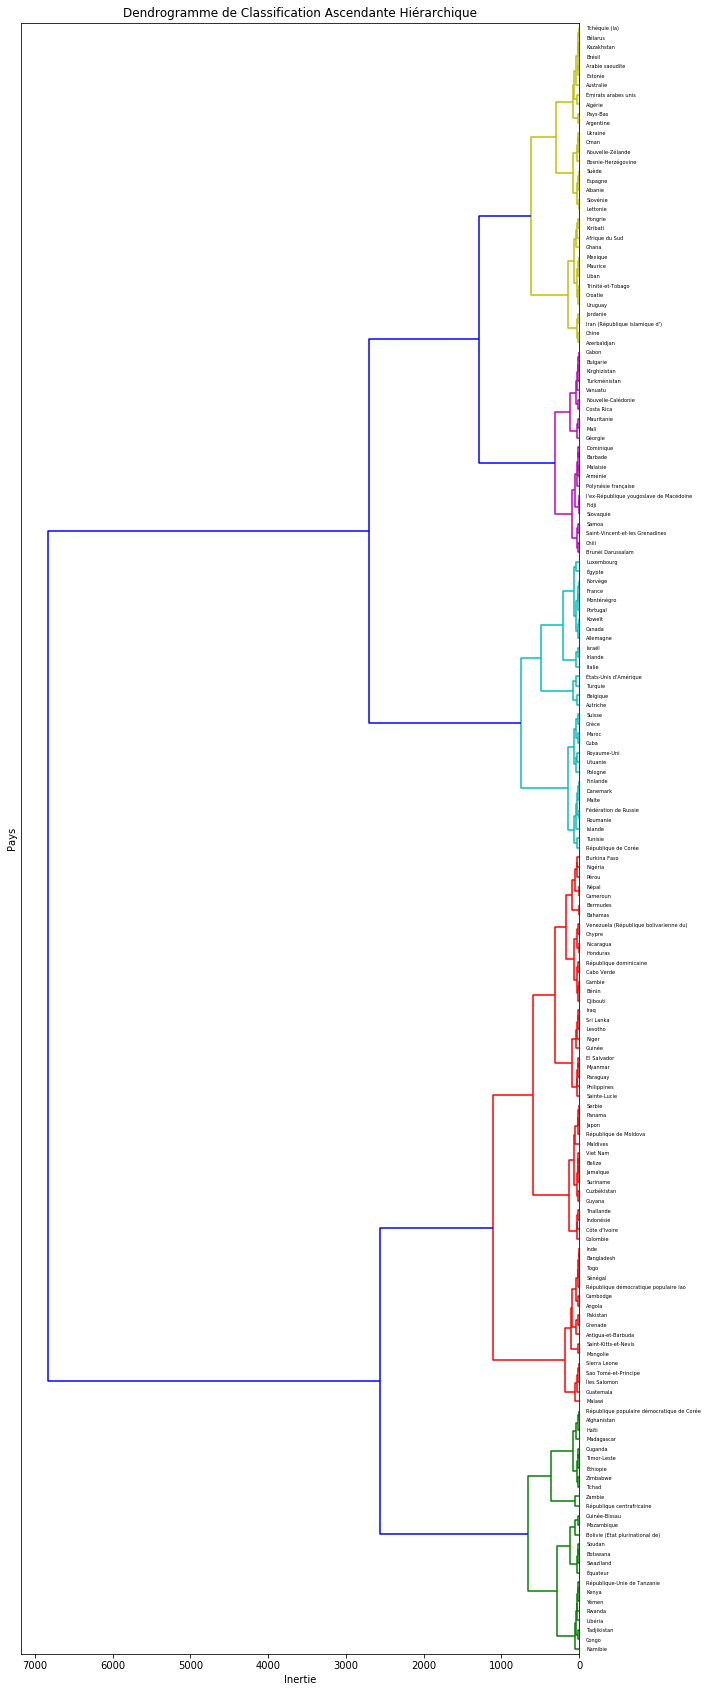

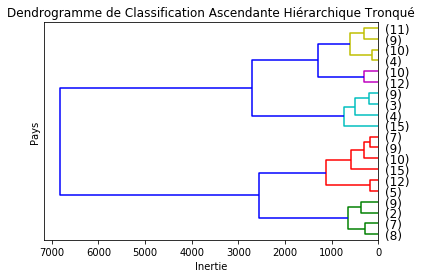

In [155]:

X = df_base.values 
#Y = ssd.pdist(X) #Ne prend pas de str
Z = sch.linkage(X,method='ward',metric='euclidean')
#La méthode de Ward consiste à regrouper les classes de façon que l'augmentation de ...
#...l'inertie interclasse soit maximum, ou ce qui revient au même d'après le théorème de Huygens,..
#...de façon que l'augmentation de l'inertie intraclasse soit minimum

plt.figure(figsize=(10,30))
plt.title('Dendrogramme de Classification Ascendante Hiérarchique')
plt.xlabel("Inertie")
plt.ylabel('Pays')
entire_dendro = sch.dendrogram(Z,labels = df_base.index,color_threshold=1200, orientation='left')
plt.show(entire_dendro)

plt.title('Dendrogramme de Classification Ascendante Hiérarchique Tronqué')
plt.xlabel("Inertie")
plt.ylabel('Pays')
truncate_dendro = sch.dendrogram(Z,labels = df_base.index,color_threshold=1200, orientation='left', p=20, truncate_mode='lastp')
plt.show(truncate_dendro)

# Caractérisez chacun de ces groupes selon les variables cités précédemment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vue de vos objectifs.

## Caractérisez chacun de ces groupes selon les variables cités précédemment

Caratérisez chacun des groupes = Analyse Univarié ou Bivarié pour chacun des groupes pour trouver des critéres de distinctions

### Decoupage en classes - Matérialisation des groupes

In [156]:
#découpage á la hauteur t=46 --> identifiants de 5 groupes
groupes_cah = sch.fcluster(Z,t=1200,criterion='distance')
print(groupes_cah)



[4 1 5 5 2 2 5 5 3 2 4 2 2 1 1 5 2 2 4 4 2 2 3 2 1 2 1 4 2 1 4 3 2 5 2 3 4
 2 5 1 3 2 5 4 3 3 4 2 4 4 2 3 5 5 5 3 2 2 2 2 1 2 5 5 3 2 2 5 2 3 3 3 2 5
 2 2 5 4 1 2 1 3 3 5 2 5 2 1 3 1 2 4 2 4 3 4 5 5 2 3 1 2 1 2 5 4 4 4 5 2 2
 2 3 2 2 5 2 2 2 3 3 1 1 1 3 1 3 2 2 4 2 5 2 2 5 4 5 5 2 1 1 5 3 4 1 2 2 5
 5 3 3 5 1 3 5 3 2 5 2 2 2 1 4 1 1 3 3 2 3 1 5]


In [157]:
#index triés des groupes
idg = np.argsort(groupes_cah)

In [158]:
#affichage des observations et leurs groupes
df_groupes_cah = pd.DataFrame(df_base.index[idg],groupes_cah[idg]).reset_index()
df_groupes_cah = df_groupes_cah.rename(columns={'index':'groupe_cah'})
print(df_groupes_cah)

     groupe_cah                                        Pays
0             1                                    Éthiopie
1             1                                  Madagascar
2             1                               Guinée-Bissau
3             1                                     Ouganda
4             1                                 Timor-Leste
5             1                                    Équateur
6             1                                    Zimbabwe
7             1                                      Rwanda
8             1                                       Yémen
9             1                                       Haïti
10            1                                     Libéria
11            1                                       Congo
12            1                                       Tchad
13            1                                   Swaziland
14            1                                      Zambie
15            1                   Républ

In [159]:
#Réindexation df_base pour jointure
df_base.reset_index(inplace=True)

In [160]:
joint_df_base_cah_group = pd.merge(df_groupes_cah,df_base)
joint_df_base_cah_group

,groupe_cah,Pays,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
0,1,Éthiopie,2.585878,2129.0,60.39,12.733896
1,1,Madagascar,2.830358,2056.0,46.69,21.503534
2,1,Guinée-Bissau,2.403846,2288.0,44.05,20.408627
3,1,Ouganda,3.392395,2126.0,52.64,23.537234
4,1,Timor-Leste,1.705566,2129.0,57.51,31.333681
5,1,Équateur,1.587916,2346.0,61.30,59.624796
6,1,Zimbabwe,3.104051,2113.0,48.32,24.482616
7,1,Rwanda,2.784081,2224.0,56.79,9.860891
8,1,Yémen,2.326849,2217.0,58.90,23.684211
9,1,Haïti,1.405544,2089.0,47.70,21.299790


### Construction des dataframes de chaque groupe

In [161]:
df_groupe1 = joint_df_base_cah_group[joint_df_base_cah_group['groupe_cah']==1]
df_groupe2 = joint_df_base_cah_group[joint_df_base_cah_group['groupe_cah']==2]
df_groupe3 = joint_df_base_cah_group[joint_df_base_cah_group['groupe_cah']==3]
df_groupe4 = joint_df_base_cah_group[joint_df_base_cah_group['groupe_cah']==4]
df_groupe5 = joint_df_base_cah_group[joint_df_base_cah_group['groupe_cah']==5]

In [162]:
type(df_groupe1['groupe_cah'])

pandas.core.series.Series

### Analyse


In [182]:
def analyse_univarie(data,moncaract='',typecaract=''):
    """Construit une analyse univarie selon le type de variable
    - Distribution empirique 
    - Représentation 
    - Mesure de tendance centrale 
    - Mesure de dispersion 
    - Mesure de concentration (cas continue)"""
    
    if typecaract=='qtedisc': # Variable quantitative discrète
        #Construction du tableau de distribution
        effectifs = data[moncaract].value_counts()

        modalites = effectifs.index # l'index de effectifs contient les modalités
        tab = pd.DataFrame(modalites, columns = [moncaract]) #création du tableau à partir des modalités

        tab["n"] = effectifs.values

        tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon

        tab = tab.sort_values(moncaract) # tri des valeurs de la variable X (croissant)
        tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
        
        moyenne = data[moncaract].mean()
        mediane = data[moncaract].median()
        mode = data[moncaract].mode()
        
        mesure_tendance_centrale = """Variable {} :
        - Moyenne = {}
        - Médiane = {}
        - Mode = {}""".format(moncaract,moyenne,mediane,mode)
        
        variance = data[moncaract].var(ddof=0)
        ecart_type = data[moncaract].std(ddof=0)
        mesure_dispersion = """Variable {} :
        - Variance = {}
        - Ecart-type = {}""".format(moncaract,variance,ecart_type)
        
        #Représentation
        representation = str(input("Choisir représentation : Diagramme en bâtons ('diagbat') ou Courbe cumulative ('courbcum') :"))
        
        if representation == 'diagbat':
            abcisses = str(input("Donner le nom de la variable x :"))
            tab_plot = tab.plot(x=abcisses,y='n',kind='bar', figsize=(20,10), colormap='copper')
            titre = str(input("Donner le nom du titre du graphique :"))
            plt.title(titre)
            legend = str(input("Donner le nom de la légende du graphique :"))
            plt.legend(title=legend, loc='upper left')
            ylabel = str(input("Donner le nom de l'axe des ordonnés du graphique :"))
            plt.ylabel(ylabel)
            xlabel = str(input("Donner le nom de l'axe des abcisses du graphique :"))
            plt.xlabel(xlabel)
            plt.show(tab_plot)
            save_image = str(input("Sauvegarder l'image ? (y/n) :"))
            if save_image =='y': 
                image= tab_plot.get_figure()
                image.savefig('Images/{}'.format(titre))
            else:
                print("Pas de sauvegarde")
            print(mesure_tendance_centrale)
            print(mesure_dispersion)
            return tab
        else:
            abcisses = str(input("Donner le nom de la variable x :"))
            tab_plot = tab.plot(x=abcisses,y='F',kind='line', figsize=(20,10), colormap='copper')
            titre = str(input("Donner le nom du titre du graphique :"))
            plt.title(titre)
            legend = str(input("Donner le nom de la légende du graphique :"))
            plt.legend(title=legend, loc='upper left')
            ylabel = str(input("Donner le nom de l'axe des ordonnés du graphique :"))
            plt.ylabel(ylabel)
            xlabel = str(input("Donner le nom de l'axe des abcisses du graphique :"))
            plt.xlabel(xlabel)
            plt.show(tab_plot)
            save_image = str(input("Sauvegarder l'image ? (y/n) :"))
            if save_image == 'y': 
                image= tab_plot.get_figure()
                image.savefig('Images/{}'.format(titre))
            else:
                print("Pas de sauvegarde")
            print(mesure_tendance_centrale)
            print(mesure_dispersion)
            return tab
        
    elif typecaract=='qtecont': # Variable quantitative continue
        #Construction du tableau de distribution
        
        effectifs = data[moncaract].value_counts()

        modalites = effectifs.index # l'index de effectifs contient les modalités
        tab = pd.DataFrame(modalites, columns = [moncaract]) #création du tableau à partir des modalités

        tab["n"] = effectifs.values

        tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon
        
        amplitude = int(input("Choisir l'amplitude des classes :"))
        tab[moncaract]= pd.cut(tab[moncaract],bins=20)

        tab = tab.sort_values(moncaract) # tri des valeurs de la variable X (croissant)
        tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
        
        moyenne = data[moncaract].mean()
        mediane = data[moncaract].median()
        mode = data[moncaract].mode()
        
        mesure_tendance_centrale = """Variable {} :
        - Moyenne = {}
        - Médiane = {}
        - Mode = {}""".format(moncaract,moyenne,mediane,mode)
        
        variance = data[moncaract].var(ddof=0)
        ecart_type = data[moncaract].std(ddof=0)
        mesure_dispersion = """Variable {} :
        - Variance = {}
        - Ecart-type = {}""".format(moncaract,variance,ecart_type)
        
        #Mesure de concentration
        
        echantillon = data[moncaract]
        #Sélection du sous-échantillon de travail que l'on appelle  revenus
        ech = echantillon.values
        #On place les observations dans une variable
        lorenz = np.cumsum(np.sort(ech)) / ech.sum()

        lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

        plot_lorenz = plt.figure()
        plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post',color='rosybrown')
        
        titre_lorenz = 'Courbe de Lorenz'
        plt.title(titre_lorenz)
        ylabel_lorenz = 'F(N,x)'
        plt.ylabel(ylabel_lorenz)
        xlabel_lorenz = 'F(x)'
        plt.xlabel(xlabel_lorenz)
        
        
        #Indice de Gini
        aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
        S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
        gini = 2*S

        plt.show(plot_lorenz)
        save_image_lorenz = str(input("Sauvegarder la courbe de lorenz ? (y/n) :"))
        if save_image_lorenz =='y': 
            image_lorenz= plot_lorenz.get_figure()
            image_lorenz.savefig('Images/{}'.format(titre_lorenz))
        print("L'indice de Gini est égal à {}".format(gini))
        
        #Représentation
        representation = str(input("Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :"))
        if representation == 'boxplot':
            abcisses = str(input("Donner le nom de la variable x :"))
            outliers = bool(input("Afficher les outliers (Bool) :"))
            plot_data = data.boxplot(column=abcisses,vert=False, showfliers=outliers)
            titre = str(input("Donner le nom du titre du graphique :"))
            plt.title(titre)
            xlabel = str(input("Donner le nom de l'axe des abcisses du graphique :"))
            plt.xlabel(xlabel)
            plt.show(plot_data)
            save_image = str(input("Sauvegarder l'image ? (y/n) :"))
            if save_image == 'y': 
                image= plot_data.get_figure()
                image.savefig('Images/{}'.format(titre))
            else:
                print("Pas de sauvegarde")
            upper_quartile = np.percentile(data[moncaract], 75)
            lower_quartile = np.percentile(data[moncaract], 25)

            iqr = upper_quartile - lower_quartile
            upper_whisker = data[moncaract] [data[moncaract]<=upper_quartile+1.5*iqr].max()
            lower_whisker = data[moncaract] [data[moncaract]>=lower_quartile-1.5*iqr].min()
            print("""La mediane est {}, Q1 est égal à {} et Q3 est égal à {} 
            L'écart inter-quartile est égal à {} et les bornes sont respectivement de {} à {}""".format(mediane, lower_quartile,upper_quartile,iqr,lower_whisker,upper_whisker))
            print(mesure_tendance_centrale)
            print(mesure_dispersion)
            
            return tab
        
        if representation == 'hist':
            abcisses = str(input("Donner le nom de la variable x :"))
           
            plot_data = data[moncaract].hist(density=True, bins=amplitude,color='rosybrown')
            titre = str(input("Donner le nom du titre du graphique :"))
            plt.title(titre)
            xlabel = str(input("Donner le nom de l'axe des abcisses du graphique :"))
            plt.xlabel(xlabel)
            ylabel = str(input("Donner le nom de l'axe des ordonnés du graphique :"))
            plt.ylabel(ylabel)
            plt.show(plot_data)
            save_image = str(input("Sauvegarder l'image ? (y/n) :"))
            if save_image == 'y': 
                image= plot_data.get_figure()
                image.savefig('Images/{}'.format(titre))
            else:
                print("Pas de sauvegarde")
            
            print(mesure_tendance_centrale)
            print(mesure_dispersion)
            
            return tab
    elif typecaract=='qual':
        #Construction du tableau de distribution
        effectifs = data[moncaract].value_counts()

        modalites = effectifs.index # l'index de effectifs contient les modalités
        tab = pd.DataFrame(modalites, columns = [moncaract]) #création du tableau à partir des modalités

        tab["n"] = effectifs.values

        tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon

        #Représentation
        representation = str(input("Choisir représentation : Camenbert ('camenb') ou Tuyau d'orgue ('tuyau') :"))
        
        if representation == 'diagbat':
            abcisses = str(input("Donner le nom de la variable x :"))
            tab_plot = tab['f'].plot(kind='pie',autopct = lambda x: str(round(x, 2)) + '%')
            plt.axis('equal')
            titre = str(input("Donner le nom du titre du graphique :"))
            plt.title(titre)
            
            ylabel = str(input("Donner le nom de l'axe des ordonnés du graphique :"))
            plt.ylabel(ylabel)
            
            plt.show(tab_plot)
            save_image = str(input("Sauvegarder l'image ? (y/n) :"))
            if save_image =='y': 
                image= tab_plot.get_figure()
                image.savefig('Images/{}'.format(titre))
            else:
                print("Pas de sauvegarde")
            print(mesure_tendance_centrale)
            print(mesure_dispersion)
            return tab
        else:
            abcisses = str(input("Donner le nom de la variable x :"))
            tab_plot = tab.plot(x=abcisses,y='n',kind='bar', figsize=(20,10), colormap='copper')
            titre = str(input("Donner le nom du titre du graphique :"))
            plt.title(titre)
            legend = str(input("Donner le nom de la légende du graphique :"))
            plt.legend(title=legend, loc='upper left')
            ylabel = str(input("Donner le nom de l'axe des ordonnés du graphique :"))
            plt.ylabel(ylabel)
            xlabel = str(input("Donner le nom de l'axe des abcisses du graphique :"))
            plt.xlabel(xlabel)
            plt.show(tab_plot)
            save_image = str(input("Sauvegarder l'image ? (y/n) :"))
            if save_image == 'y': 
                image= tab_plot.get_figure()
                image.savefig('Images/{}'.format(titre))
            else:
                print("Pas de sauvegarde")
            print(mesure_tendance_centrale)
            print(mesure_dispersion)
            return tab
        
    else:
        print("""Erreur : Insérer un type de variable parmi les choix suivants :
              - Variable quantitative discrète 'qtedisc' 
              - Variable quantitative continue 'qtecont' 
              - Variable quantitative 'qtequal'""")

## Caractérisez chacun de ces groupes selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vue de vos objectifs.

### Ajout de la variable PIB par Habitant

### Analyse

### Calcul des centroïdes de chacun des groupes